In [24]:
import pandas as pd
import numpy as np
import math
from IPython.display import Markdown, display
from scipy.stats import skew
import seaborn as sns
import matplotlib.pyplot as plt    
from dataHack import removeColl 
#%matplotlib inline
import warnings
import scipy
warnings.filterwarnings('ignore')
import networkx as nx
%load_ext autotime
def printmd(string):
    display(Markdown(string))
import plotly.offline as py1
py1.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import os
import plotly
import plotly.plotly as py
from plotly.tools import FigureFactory as ff
plotly.tools.set_credentials_file(username='sushant.bharti', api_key='WptZURbEo6AnBZpSHNgO')
plt.style.use('seaborn-bright')
pal = sns.color_palette()

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime


time: 1.39 s


In [46]:
df_train = pd.read_csv('../quora pairs/train.csv')
df_train.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


time: 25.9 s


In [3]:
print df_train.info()
print '\n\nId :',df_train.id.nunique(),'\nQid :',df_train.qid1.nunique(),'\n\nDuplicate\n',df_train.is_duplicate.value_counts()
print('Duplicate pairs: {}%'.format(round(df_train['is_duplicate'].mean()*100, 2)))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
id              404290 non-null int64
qid1            404290 non-null int64
qid2            404290 non-null int64
question1       404290 non-null object
question2       404288 non-null object
is_duplicate    404290 non-null int64
dtypes: int64(4), object(2)
memory usage: 18.5+ MB
None


Id : 404290 
Qid : 290654 

Duplicate
0    255027
1    149263
Name: is_duplicate, dtype: int64
Duplicate pairs: 36.92%
time: 231 ms


Total number of question pairs for training: 404290
Duplicate pairs: 36.92%
Total number of questions in the training data: 537933
Number of questions that appear multiple times: 111780
()


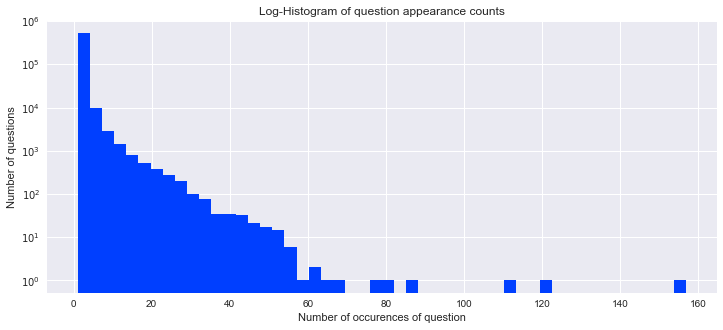

time: 2.63 s


In [4]:
print('Total number of question pairs for training: {}'.format(len(df_train)))
print('Duplicate pairs: {}%'.format(round(df_train['is_duplicate'].mean()*100, 2)))
qids = pd.Series(df_train['qid1'].tolist() + df_train['qid2'].tolist())
print('Total number of questions in the training data: {}'.format(len(
    np.unique(qids))))
print('Number of questions that appear multiple times: {}'.format(np.sum(qids.value_counts() > 1)))

plt.figure(figsize=(12, 5))
plt.hist(qids.value_counts(), bins=50)
plt.yscale('log', nonposy='clip')
plt.title('Log-Histogram of question appearance counts')
plt.xlabel('Number of occurences of question')
plt.ylabel('Number of questions')
print()

In [5]:
from sklearn.metrics import log_loss

p = df_train['is_duplicate'].mean() # Our predicted probability
printmd('### Predicted score:'+ str( log_loss(df_train['is_duplicate'], np.zeros_like(df_train['is_duplicate']) + p)))

df_test = pd.read_csv('test.csv')
sub = pd.DataFrame({'test_id': df_test['test_id'], 'is_duplicate': p})


### Predicted score:0.658527383984

time: 6.99 s


In [6]:
print df_test.info()
print '\n\nId :',df_test.test_id.nunique(),'\nQid :',df_test.question1.nunique()#,'\n\nDuplicate\n',df_test.is_duplicate.value_counts()
#print('Duplicate pairs: {}%'.format(round(df_test['is_duplicate'].mean()*100, 2)))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345796 entries, 0 to 2345795
Data columns (total 3 columns):
test_id      int64
question1    object
question2    object
dtypes: int64(1), object(2)
memory usage: 53.7+ MB
None


Id : 2345796 
Qid : 2211008
time: 1.24 s


In [7]:
printmd('#### LB score 0.55 ')

#### LB score 0.55 

time: 4 ms


In [8]:
print('Total number of question pairs for testing: {}'.format(len(df_test)))

Total number of question pairs for testing: 2345796
time: 100 ms


# Characters per question

mean-train 59.86 std-train 31.99 mean-test 60.11 std-test 31.66 max-train 1169.00 max-test 1176.00


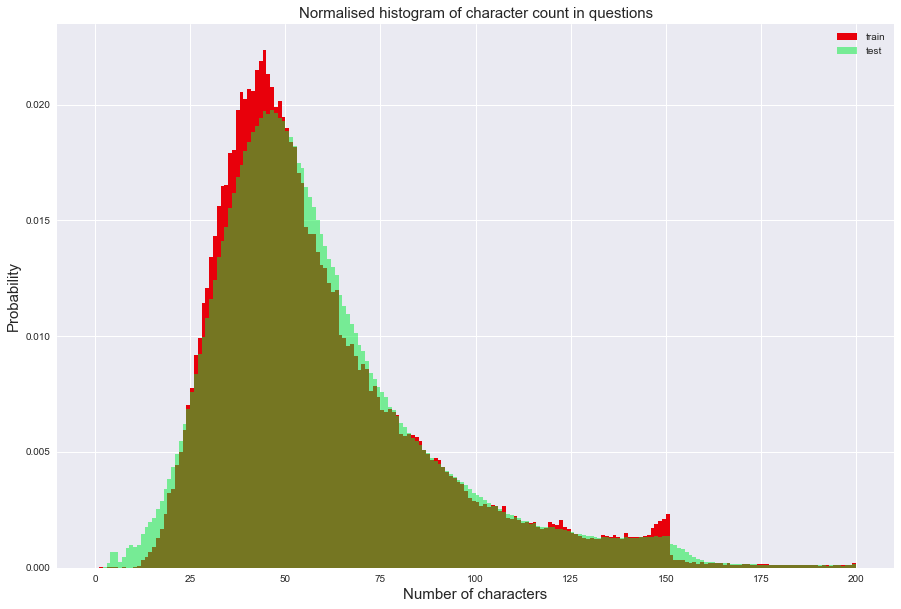

time: 6.12 s


In [9]:
train_qs = pd.Series(df_train['question1'].tolist() + df_train['question2'].tolist()).astype(str)
test_qs = pd.Series(df_test['question1'].tolist() + df_test['question2'].tolist()).astype(str)

dist_train = train_qs.apply(len)
dist_test = test_qs.apply(len)
plt.figure(figsize=(15, 10))
plt.hist(dist_train, bins=200, range=[0, 200], color=pal[2], normed=True, label='train')
plt.hist(dist_test, bins=200, range=[0, 200], color=pal[1], normed=True, alpha=0.5, label='test')
plt.title('Normalised histogram of character count in questions', fontsize=15)
plt.legend()
plt.xlabel('Number of characters', fontsize=15)
plt.ylabel('Probability', fontsize=15)
printmd('# Characters per question')
print('mean-train {:.2f} std-train {:.2f} mean-test {:.2f} std-test {:.2f} max-train {:.2f} max-test {:.2f}'.format(dist_train.mean(), 
                          dist_train.std(), dist_test.mean(), dist_test.std(), dist_train.max(), dist_test.max()))

In [10]:
print len(dist_train)
dist_train.head()

808580


0    66
1    51
2    73
3    50
4    76
dtype: int64

time: 7 ms


In [11]:
print len(train_qs)
train_qs.head()

808580


0    What is the step by step guide to invest in sh...
1    What is the story of Kohinoor (Koh-i-Noor) Dia...
2    How can I increase the speed of my internet co...
3    Why am I mentally very lonely? How can I solve...
4    Which one dissolve in water quikly sugar, salt...
dtype: object

time: 77 ms


# Words per Question

mean-train 11.06 std-train 5.89 mean-test 11.02 std-test 5.84 max-train 237.00 max-test 238.00


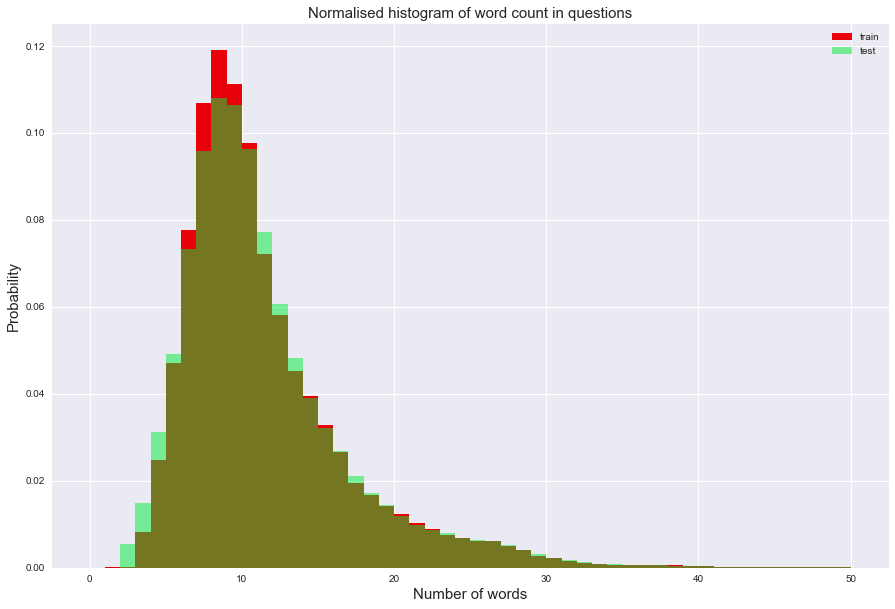

time: 7.21 s


In [12]:
dist_train = train_qs.apply(lambda x: len(x.split(' ')))
dist_test = test_qs.apply(lambda x: len(x.split(' ')))

plt.figure(figsize=(15, 10))
plt.hist(dist_train, bins=50, range=[0, 50], color=pal[2], normed=True, label='train')
plt.hist(dist_test, bins=50, range=[0, 50], color=pal[1], normed=True, alpha=0.5, label='test')
plt.title('Normalised histogram of word count in questions', fontsize=15)
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Probability', fontsize=15)
printmd('# Words per Question')
print('mean-train {:.2f} std-train {:.2f} mean-test {:.2f} std-test {:.2f} max-train {:.2f} max-test {:.2f}'.format(dist_train.mean(), 
                          dist_train.std(), dist_test.mean(), dist_test.std(), dist_train.max(), dist_test.max()))

In [13]:
print len(dist_train)
dist_train.head()

808580


0    14
1     8
2    14
3    11
4    13
dtype: int64

time: 17 ms


# Semantic Analysis

In [14]:
qmarks = np.mean(train_qs.apply(lambda x: '?' in x))
math = np.mean(train_qs.apply(lambda x: '[math]' in x))
fullstop = np.mean(train_qs.apply(lambda x: '.' in x))
capital_first = np.mean(train_qs.apply(lambda x: x[0].isupper()))
capitals = np.mean(train_qs.apply(lambda x: max([y.isupper() for y in x])))
numbers = np.mean(train_qs.apply(lambda x: max([y.isdigit() for y in x])))

print('Questions with question marks: {:.2f}%'.format(qmarks * 100))
print('Questions with [math] tags: {:.2f}%'.format(math * 100))
print('Questions with full stops: {:.2f}%'.format(fullstop * 100))
print('Questions with capitalised first letters: {:.2f}%'.format(capital_first * 100))
print('Questions with capital letters: {:.2f}%'.format(capitals * 100))
print('Questions with numbers: {:.2f}%'.format(numbers * 100))

Questions with question marks: 99.87%
Questions with [math] tags: 0.12%
Questions with full stops: 6.31%
Questions with capitalised first letters: 99.81%
Questions with capital letters: 99.95%
Questions with numbers: 11.83%
time: 14.8 s


## Word share

In [15]:
def normalized_word_share(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split()))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split()))    
    return 1.0 * len(w1 & w2)/(len(w1) + len(w2))

df_train.fillna('',inplace=True)
df_train['word_share']=df_train.apply(normalized_word_share, axis=1)


time: 20.3 s


In [16]:
df_train.head()

,id,qid1,qid2,question1,question2,is_duplicate,word_share
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,0.434783
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,0.200000
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,0.166667
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,0.000000
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,0.100000


time: 14 ms


In [17]:
from nltk.corpus import stopwords
df_train.fillna('',inplace=True)
stops = set(stopwords.words("english"))

def word_match_share(row):
    q1words = {}
    q2words = {}
    for word in str(row['question1']).lower().split():
        if word not in stops:
            q1words[word] = 1
    for word in str(row['question2']).lower().split():
        if word not in stops:
            q2words[word] = 1
    if len(q1words) == 0 or len(q2words) == 0:
        # The computer-generated chaff includes a few questions that are nothing but stopwords
        return 0
    shared_words_in_q1 = [w for w in q1words.keys() if w in q2words]
    shared_words_in_q2 = [w for w in q2words.keys() if w in q1words]
    R = float(len(shared_words_in_q1) + len(shared_words_in_q2))/(len(q1words) + len(q2words))
    return R


train_word_match = df_train.apply(word_match_share, axis=1 ,raw=True)


time: 20.8 s


In [18]:

print train_word_match.head(),'\n' ,len(train_word_match)

0    0.727273
1    0.307692
2    0.363636
3    0.000000
4    0.000000
dtype: float64 
404290
time: 4 ms


In [19]:

#len(obj.idf_),len(train_qs),len(obj.get_feature_names()),len(set(words))

time: 71 ms


In [20]:
from collections import Counter

# If a word appears only once, we ignore it completely (likely a typo)
# Epsilon defines a smoothing constant, which makes the effect of extremely rare words smaller
def get_weight(count, eps=10000, min_count=2):
    if count < min_count:
        return 0
    else:
        return 1 / float(count + eps)

eps = 5000 
words = (" ".join(train_qs)).lower().split()
counts = Counter(words)
weights = {word: get_weight(count) for word, count in counts.items()}

time: 5.31 s


In [21]:
print len(weights),len(words)


201105 8944593
time: 3 ms


In [22]:
print('Most common words and weights: \n')
print(sorted(weights.items(), key=lambda x: x[1] if x[1] > 0 else 9999)[:10])
print('\nLeast common words and weights: ')
(sorted(weights.items(), key=lambda x: x[1], reverse=True)[:10])

Most common words and weights: 

[('the', 2.5891040146646852e-06), ('what', 3.115623919267953e-06), ('is', 3.5861702928825277e-06), ('how', 4.366449945201053e-06), ('i', 4.4805878531263305e-06), ('a', 4.540645588989843e-06), ('to', 4.671434644293609e-06), ('in', 4.884625153865692e-06), ('of', 5.920242493132519e-06), ('do', 6.070908207867897e-06)]

Least common words and weights: 


[('kernel:', 9.998000399920016e-05),
 ('chameleons', 9.998000399920016e-05),
 ('275', 9.998000399920016e-05),
 ('276', 9.998000399920016e-05),
 ('kid:', 9.998000399920016e-05),
 ('usenet', 9.998000399920016e-05),
 ('(football', 9.998000399920016e-05),
 ('sneha', 9.998000399920016e-05),
 ('population)', 9.998000399920016e-05),
 (',delhi', 9.998000399920016e-05)]

time: 1.14 s


In [23]:
def tfidf_word_match_share(row):
    q1words = {}
    q2words = {}
    for word in str(row['question1']).lower().split():
        if word not in stops:
            q1words[word] = 1
    for word in str(row['question2']).lower().split():
        if word not in stops:
            q2words[word] = 1
    if len(q1words) == 0 or len(q2words) == 0:
        # The computer-generated chaff includes a few questions that are nothing but stopwords
        return 0
    
    shared_weights = [weights.get(w, 0) for w in q1words.keys() if w in q2words] + [weights.get(w, 0) for w in q2words.keys() if w in q1words]
    total_weights = [weights.get(w, 0) for w in q1words] + [weights.get(w, 0) for w in q2words]
    
    R = np.sum(shared_weights) / np.sum(total_weights)
    return R

time: 12 ms


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
obj = TfidfVectorizer()
corpus = train_qs
#X = obj.fit_transform(corpus)



time: 73 ms


In [25]:

tfidf_train_word_match = df_train.apply(tfidf_word_match_share, axis=1)


time: 34 s


In [26]:
tfidf_train_word_match.head(),len(tfidf_train_word_match)

(0    0.772164
 1    0.361758
 2    0.355191
 3    0.000000
 4    0.000000
 dtype: float64, 404290)

time: 4 ms


In [27]:
# First we create our training and testing data
x_train = pd.DataFrame()
x_test = pd.DataFrame()
x_train['word_match'] = train_word_match
x_train['tfidf_word_match'] = tfidf_train_word_match
x_test['word_match'] = df_test.apply(word_match_share, axis=1, raw=True)
x_test['tfidf_word_match'] = df_test.apply(tfidf_word_match_share, axis=1, raw=True)

y_train = df_train['is_duplicate'].values

time: 5min 4s


In [28]:
x_train.info(),x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 2 columns):
word_match          404290 non-null float64
tfidf_word_match    404270 non-null float64
dtypes: float64(2)
memory usage: 6.2 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345796 entries, 0 to 2345795
Data columns (total 2 columns):
word_match          float64
tfidf_word_match    float64
dtypes: float64(2)
memory usage: 35.8 MB


(None, None)

time: 70 ms


In [29]:
df_train['question1'].fillna('',inplace=True)
df_test['question1'].fillna('',inplace=True)

time: 334 ms


In [30]:
df_test['question2']=df_test['question2'].apply(lambda l:str(l))

time: 1.19 s


In [31]:
trainqs=df_train['question1']+' '+df_train['question2']
testqs=df_test['question1']+' '+df_test['question2']

time: 899 ms


In [32]:
x_train['wordsPerQ']=trainqs.apply(lambda x: len(x.split(' ')))
x_train['charPerQ']=trainqs.apply(len)
x_test['wordsPerQ']=testqs.apply(lambda x: len(str(x).split(' ')))
x_test['charPerQ']=testqs.apply(lambda x:len(str(x)))


time: 6.95 s


In [33]:
x_train['wordsPerQ1']=df_train['question1'].apply(lambda x: len(x.split(' ')))
x_train['wordsPerQ2']=df_train['question2'].apply(lambda x: len(x.split(' ')))
x_train['charPerQ1']=df_train['question1'].apply(len)
x_train['charPerQ2']=df_train['question2'].apply(len)


time: 1.21 s


In [34]:
x_test['wordsPerQ1']=df_test['question1'].apply(lambda x: len(x.split(' ')))
x_test['wordsPerQ2']=df_test['question2'].apply(lambda x: len(str(x).split(' ')))
x_test['charPerQ1']=df_test['question1'].apply(len)
x_test['charPerQ2']=df_test['question2'].apply(lambda x:len(str(x)))

time: 7.82 s


In [35]:
x_train['Nqmarks1'] = df_train['question1'].apply(lambda x:x.count('?') )
x_train['Nqmarks2'] = df_train['question2'].apply(lambda x:x.count('?'))
x_train['Nmath1'] = df_train['question1'].apply(lambda x: x.count('[math]'))
x_train['Nmath2'] = df_train['question2'].apply(lambda x: x.count('[math]'))
x_train['Nfullstop1'] =  df_train['question1'].apply(lambda x: x.count('.'))
x_train['Nfullstop2'] =  df_train['question2'].apply(lambda x: x.count('.'))
x_train['Ncapitals1'] =df_train['question1'].apply(lambda x: sum(1 for c in x if c.isupper()))
x_train['Ncapitals2'] =df_train['question2'].apply(lambda x: sum(1 for c in x if c.isupper()))
x_train['Ndigits1'] = df_train['question1'].apply(lambda x: sum(c.isdigit() for c in x))
x_train['Ndigits2'] = df_train['question2'].apply(lambda x: sum(c.isdigit() for c in x))




x_test['Nqmarks1'] = df_test['question1'].apply(lambda x:x.count('?') )
x_test['Nqmarks2'] = df_test['question2'].apply(lambda x:x.count('?'))
x_test['Nmath1'] = df_test['question1'].apply(lambda x: x.count('[math]'))
x_test['Nmath2'] = df_test['question2'].apply(lambda x: x.count('[math]'))
x_test['Nfullstop1'] =  df_test['question1'].apply(lambda x: x.count('.'))
x_test['Nfullstop2'] =  df_test['question2'].apply(lambda x: x.count('.'))
x_test['Ncapitals1'] =df_test['question1'].apply(lambda x: sum(1 for c in x if c.isupper()))
x_test['Ncapitals2'] =df_test['question2'].apply(lambda x: sum(1 for c in x if c.isupper()))
x_test['Ndigits1'] = df_test['question1'].apply(lambda x: sum(c.isdigit() for c in x))
x_test['Ndigits2'] = df_test['question2'].apply(lambda x: sum(c.isdigit() for c in x))

time: 1min 25s


In [36]:
x_train['qmarks'] = trainqs.apply(lambda x: 1 if '?' in x else 0)
x_train['math'] = trainqs.apply(lambda x: 1 if '[math]' in x else 0)
x_train['fullstop'] = trainqs.apply(lambda x: 1 if '.' in x else 0)
x_train['capital_first'] = trainqs.apply(lambda x: 1 if x[0].isupper() else 0)
x_train['capitals'] = trainqs.apply(lambda x: 1 if max([y.isupper() for y in x]) else 0)
x_train['numbers'] = trainqs.apply(lambda x: 1 if max([y.isdigit() for y in x])else 0)


x_test['qmarks'] = testqs.apply(lambda x: 1 if '?' in x else 0)
x_test['math'] = testqs.apply(lambda x: 1 if '[math]' in x else 0)
x_test['fullstop'] = testqs.apply(lambda x: 1 if '.' in x else 0)
x_test['capital_first'] = testqs.apply(lambda x: 1 if x[0].isupper() else 0)
x_test['capitals'] = testqs.apply(lambda x: 1 if max([y.isupper() for y in x]) else 0)
x_test['numbers'] = testqs.apply(lambda x: 1 if  max([y.isdigit() for y in x]) else 0)

time: 1min 39s


In [37]:
#x_train=x_train.replace(to_replace=True, value=1)
#x_train=x_train.replace(to_replace=False, value=0)

#x_test=x_test.replace(to_replace=True, value=1)
#x_test=x_test.replace(to_replace=False, value=0)

time: 8 ms


In [38]:
x_train.head(),x_test.head()

(   word_match  tfidf_word_match  wordsPerQ  charPerQ  wordsPerQ1  wordsPerQ2  \
 0    0.727273          0.772164         26       124          14          12   
 1    0.307692          0.361758         21       140           8          13   
 2    0.363636          0.355191         24       133          14          10   
 3    0.000000          0.000000         20       116          11           9   
 4    0.000000          0.000000         20       116          13           7   
 
    charPerQ1  charPerQ2  Nqmarks1  Nqmarks2   ...     Ncapitals1  Ncapitals2  \
 0         66         57         1         1   ...              1           1   
 1         51         88         1         1   ...              5           5   
 2         73         59         1         1   ...              5           5   
 3         50         65         2         1   ...              4           1   
 4         76         39         1         1   ...              1           1   
 
    Ndigits1  Ndigits2  

time: 1.18 s


In [39]:
#train_qs.apply(lambda x: 1)#.sum()

time: 1e+03 µs


In [40]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 24 columns):
word_match          404290 non-null float64
tfidf_word_match    404270 non-null float64
wordsPerQ           404290 non-null int64
charPerQ            404290 non-null int64
wordsPerQ1          404290 non-null int64
wordsPerQ2          404290 non-null int64
charPerQ1           404290 non-null int64
charPerQ2           404290 non-null int64
Nqmarks1            404290 non-null int64
Nqmarks2            404290 non-null int64
Nmath1              404290 non-null int64
Nmath2              404290 non-null int64
Nfullstop1          404290 non-null int64
Nfullstop2          404290 non-null int64
Ncapitals1          404290 non-null int64
Ncapitals2          404290 non-null int64
Ndigits1            404290 non-null int64
Ndigits2            404290 non-null int64
qmarks              404290 non-null int64
math                404290 non-null int64
fullstop            404290 non-null int64
cap

In [31]:
x_train=pd.read_csv('x_train.csv').drop('Unnamed: 0',1)

time: 9.59 s


In [17]:
x_test=pd.read_csv('x_test.csv').drop('Unnamed: 0',1)

time: 12.4 s


In [19]:
del df_train
#gc.collect()

time: 22 ms


In [32]:
df_train = pd.read_csv('dfd_train.csv').drop(['Unnamed: 0','id', 'qid1', 'qid2', 'question1', u'question2', 'is_duplicate',
        'word_share', 's_question1', 's_question2'],1)

time: 4.76 s


In [45]:
df_test = pd.read_csv('df_test.csv').drop(['Unnamed: 0', 'question1', 'question2','test_id', 
        's_question1', 's_question2'],1)

time: 46.1 s


In [9]:
df_train.columns,df_test.columns

(Index([u'z_jaccard', u'z_cosine', u'z_len1', u'z_len2', u'z_word_len1',
        u'z_word_len2', u'z_match_ratio', u'z_word_match', u'z_tfidf_sum1',
        u'z_tfidf_sum2', u'z_tfidf_mean1', u'z_tfidf_mean2', u'z_tfidf_len1',
        u'z_tfidf_len2'],
       dtype='object'),
 Index([u'z_jaccard', u'z_cosine', u'z_len1', u'z_len2', u'z_word_len1',
        u'z_word_len2', u'z_match_ratio', u'z_word_match', u'z_tfidf_sum1',
        u'z_tfidf_sum2', u'z_tfidf_mean1', u'z_tfidf_mean2', u'z_tfidf_len1',
        u'z_tfidf_len2'],
       dtype='object'))

time: 107 ms


In [33]:
x_train = pd.concat([x_train,df_train],axis=1)

time: 309 ms


In [21]:
x_test = pd.concat([x_test,df_test],axis=1)

time: 906 ms


In [28]:
x_train.columns,df_train.columns

(Index([u'word_match', u'tfidf_word_match', u'wordsPerQ', u'charPerQ',
        u'wordsPerQ1', u'wordsPerQ2', u'charPerQ1', u'charPerQ2', u'Nqmarks1',
        u'Nqmarks2', u'Nmath1', u'Nmath2', u'Nfullstop1', u'Nfullstop2',
        u'Ncapitals1', u'Ncapitals2', u'Ndigits1', u'Ndigits2', u'qmarks',
        u'math', u'fullstop', u'capital_first', u'capitals', u'numbers', u'id',
        u'qid1', u'qid2', u'question1', u'question2', u'is_duplicate',
        u'word_share', u's_question1', u's_question2', u'z_jaccard',
        u'z_cosine', u'z_len1', u'z_len2', u'z_word_len1', u'z_word_len2',
        u'z_match_ratio', u'z_word_match', u'z_tfidf_sum1', u'z_tfidf_sum2',
        u'z_tfidf_mean1', u'z_tfidf_mean2', u'z_tfidf_len1', u'z_tfidf_len2',
        u'z_jaccard', u'z_cosine', u'z_len1', u'z_len2', u'z_word_len1',
        u'z_word_len2', u'z_match_ratio', u'z_word_match', u'z_tfidf_sum1',
        u'z_tfidf_sum2', u'z_tfidf_mean1', u'z_tfidf_mean2', u'z_tfidf_len1',
        u'z_tfidf_len2'],

Error in callback <bound method LineWatcher.stop of <autotime.LineWatcher object at 0x000000000B260240>> (for post_run_cell):


AssertionError: 

In [20]:
corrFrame=pd.DataFrame(x_train.corr().applymap(lambda l:abs(l)).unstack().reset_index())

time: 4.08 s


In [27]:
corrFrame[(corrFrame[0]==1)&(corrFrame['level_0']!=corrFrame['level_1'])]

,level_0,level_1,0
373,charPerQ1,z_len1,1.0
387,charPerQ1,z_len1,1.0
431,charPerQ2,z_len2,1.0
445,charPerQ2,z_len2,1.0
1773,z_len1,charPerQ1,1.0
1831,z_len2,charPerQ2,1.0
2571,z_len1,charPerQ1,1.0
2629,z_len2,charPerQ2,1.0


time: 15 ms


In [34]:
x_train=x_train.drop(['z_len1','z_len2'],1)

time: 656 ms


In [25]:
x_test=x_test.drop(['z_len1','z_len2'],1)

ValueError: labels ['z_len1' 'z_len2'] not contained in axis

time: 937 ms


In [10]:
def corrlist(data):
    feat=data.columns.tolist()
    corrmat=np.array(data.corr())
    print feat,len(corrmat)
    for i in range(len(corrmat)):
        for j in range(len(corrmat)):
            if j>i :
                corrmat[i][j]=0
                #print corrmat
    corrFrame= pd.DataFrame(pd.DataFrame(corrmat,columns=feat,index=feat).unstack()).reset_index()
    print plt.matshow(corrmat)
    del corrmat
    corrFrame=corrFrame[corrFrame[0]<=1].rename(columns={0:'corr'})
    return corrFrame

Error in callback <bound method LineWatcher.stop of <autotime.LineWatcher object at 0x000000000B1900B8>> (for post_run_cell):


AssertionError: 

In [27]:
feat= x_train.select_dtypes(include = ['int64','float64']).columns.values.tolist()
len(feat)
x_train=x_train[feat]

time: 704 ms


In [28]:
corr = pd.DataFrame(x_train.corr().unstack()).reset_index()

time: 2min 11s


['word_match', 'tfidf_word_match', 'wordsPerQ', 'charPerQ', 'wordsPerQ1', 'wordsPerQ2', 'charPerQ1', 'charPerQ2', 'Nqmarks1', 'Nqmarks2', 'Nmath1', 'Nmath2', 'Nfullstop1', 'Nfullstop2', 'Ncapitals1', 'Ncapitals2', 'Ndigits1', 'Ndigits2', 'qmarks', 'math', 'fullstop', 'capital_first', 'capitals', 'numbers', 'id', 'id', 'qid1', 'qid1', 'qid2', 'qid2', 'is_duplicate', 'is_duplicate', 'word_share', 'word_share', 'z_jaccard', 'z_jaccard', 'z_cosine', 'z_cosine', 'z_len1', 'z_len1', 'z_len2', 'z_len2', 'z_word_len1', 'z_word_len1', 'z_word_len2', 'z_word_len2', 'z_match_ratio', 'z_match_ratio', 'z_word_match', 'z_word_match', 'z_tfidf_sum1', 'z_tfidf_sum1', 'z_tfidf_sum2', 'z_tfidf_sum2', 'z_tfidf_mean1', 'z_tfidf_mean1', 'z_tfidf_mean2', 'z_tfidf_mean2', 'z_tfidf_len1', 'z_tfidf_len1', 'z_tfidf_len2', 'z_tfidf_len2', 'id', 'id', 'qid1', 'qid1', 'qid2', 'qid2', 'is_duplicate', 'is_duplicate', 'word_share', 'word_share', 'z_jaccard', 'z_jaccard', 'z_cosine', 'z_cosine', 'z_len1', 'z_len1', 'z

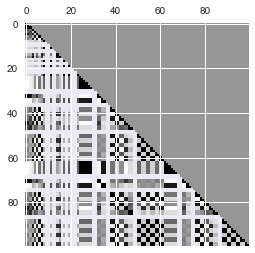

time: 685 ms


In [14]:
corr1 = corrlist(x_train.iloc[:5,:])
plt.show()

In [31]:
corr=corr.drop_duplicates().reset_index(drop=True).rename(columns={0:'corr'})

time: 15 ms


In [39]:
plt.show()

Error in callback <bound method LineWatcher.stop of <autotime.LineWatcher object at 0x000000000B1900B8>> (for post_run_cell):


AssertionError: 

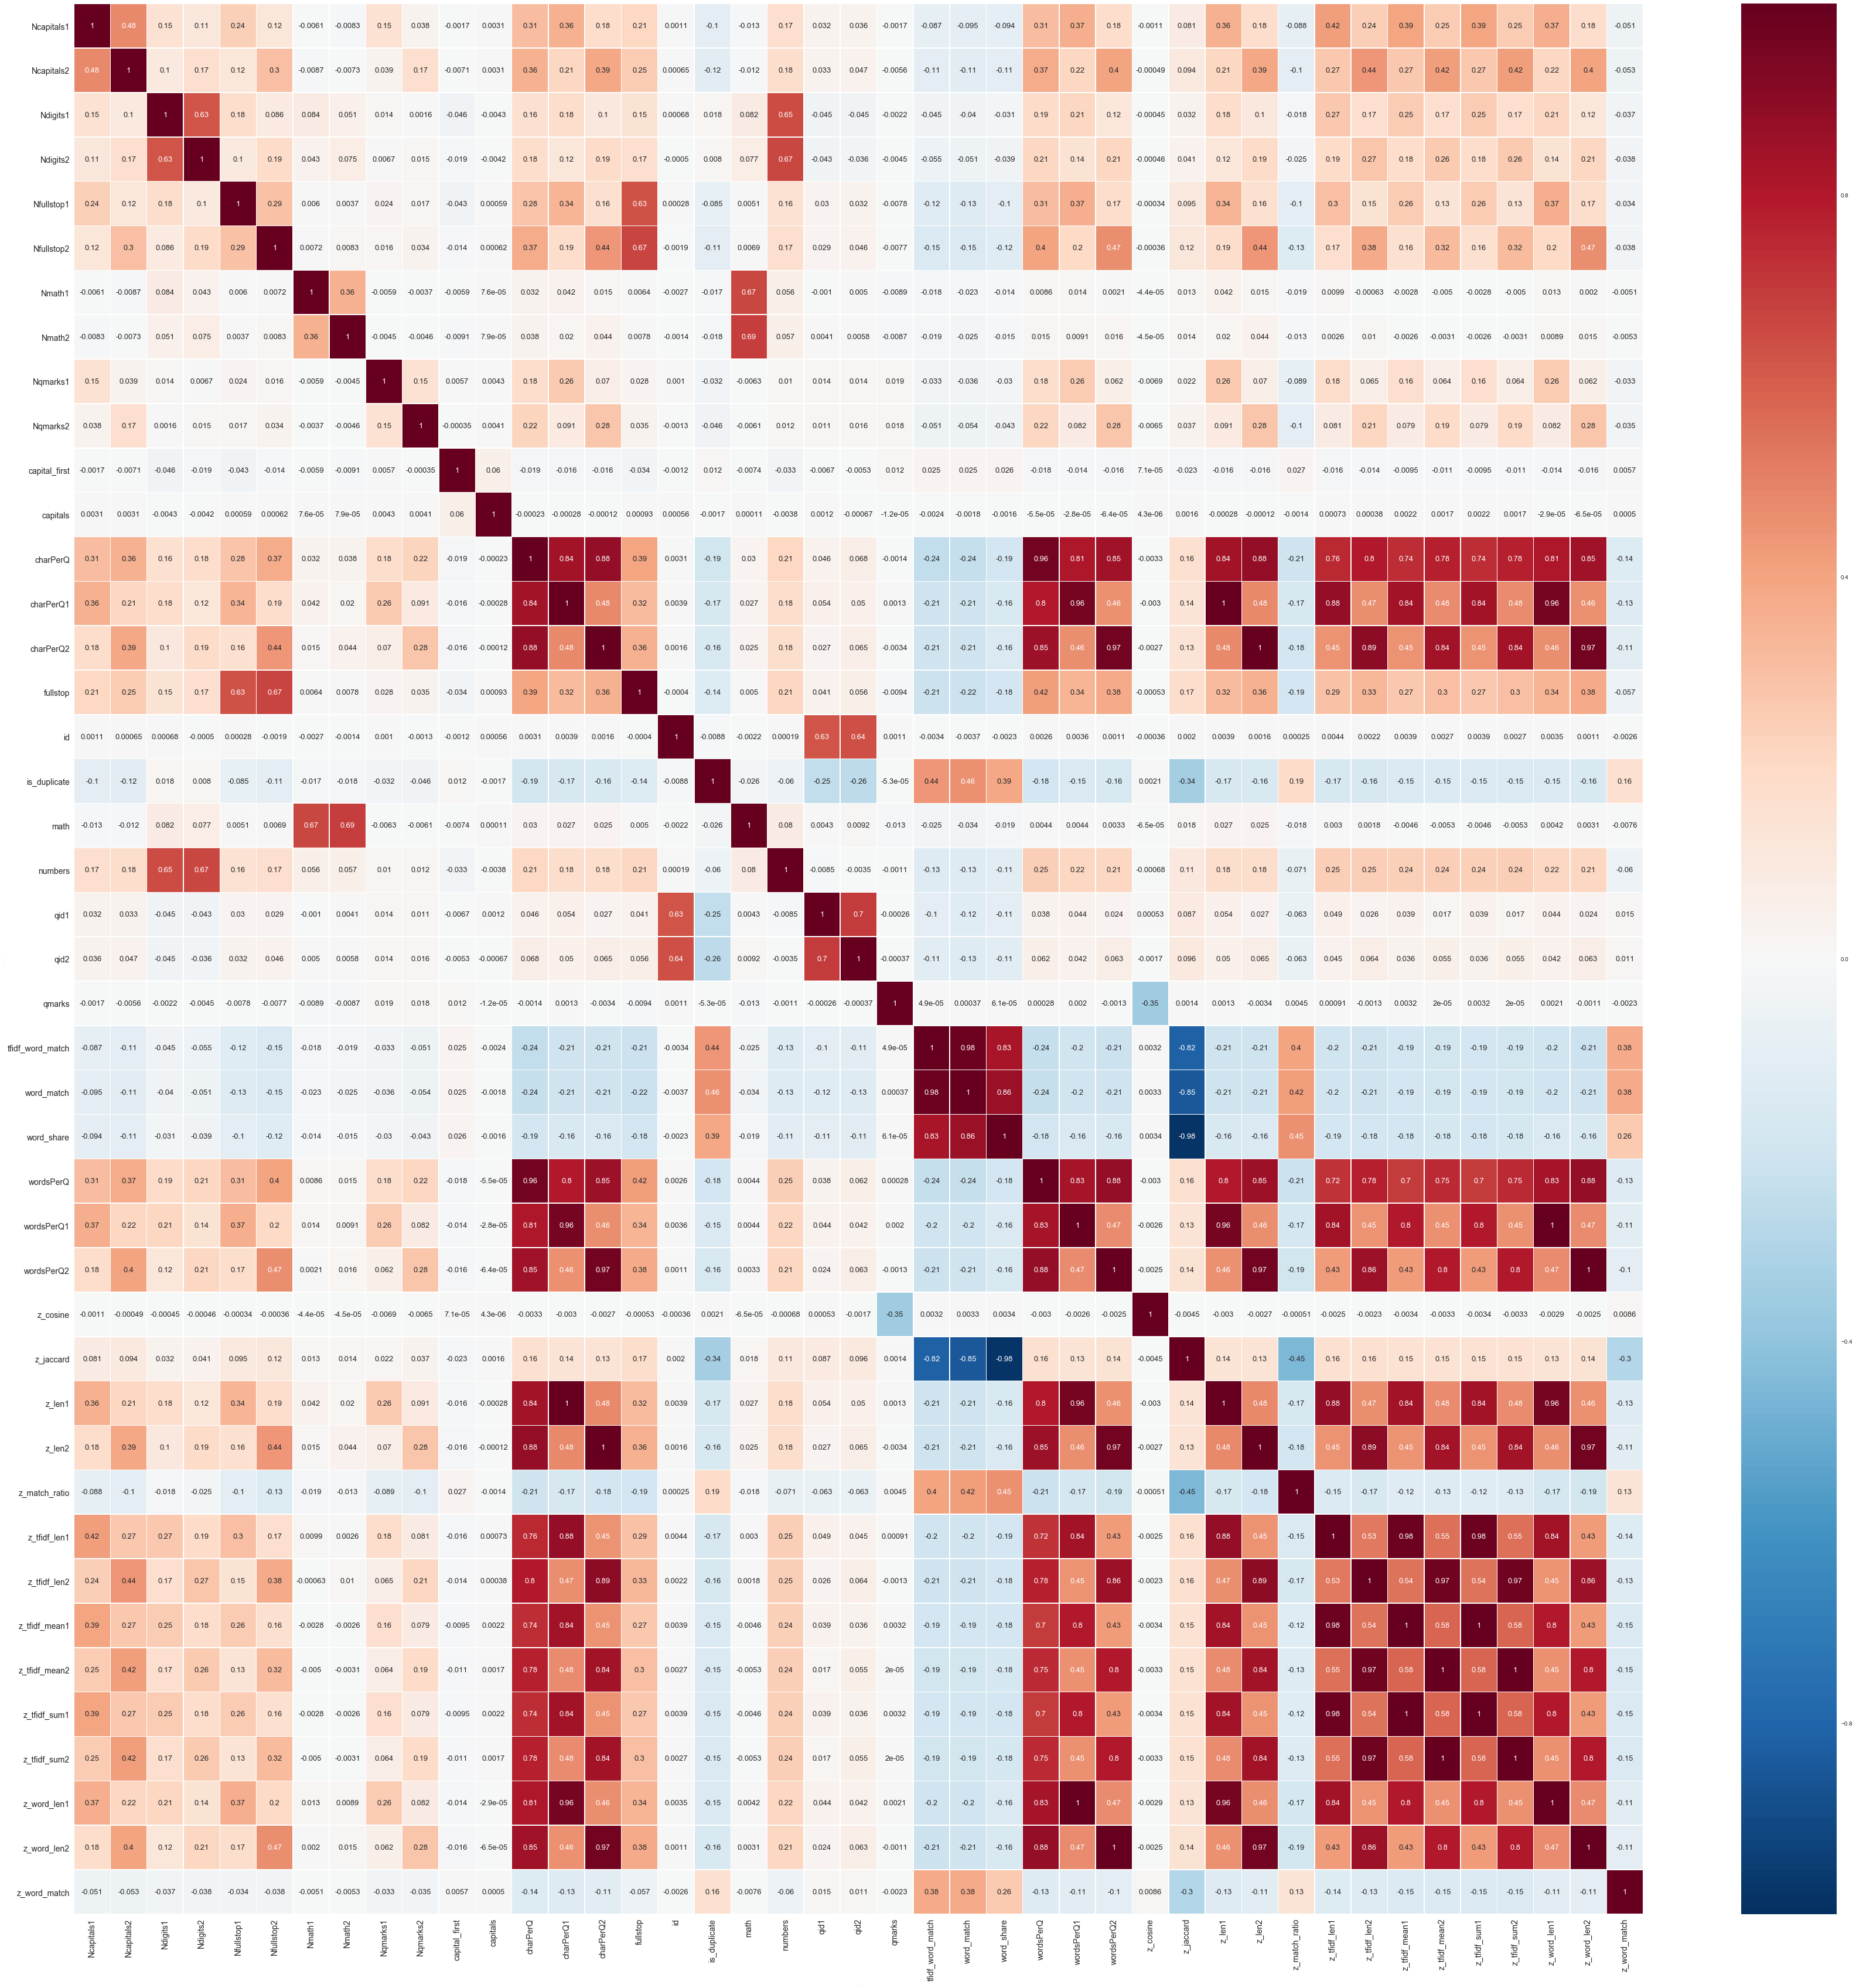

time: 12.7 s


In [32]:
import seaborn as sns
plt.rc('font', size=13)
fig = plt.figure(figsize=(60, 60))
pdata = corr.pivot("level_0", "level_1", "corr")#.fillna(0)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('xlabel', fontsize=0)
plt.ylabel('ylabel', fontsize=0)

# Draw a heatmap with the numeric values in each cell
sns.heatmap(pdata, annot=True,  linewidths=.5)
plt.show()

In [13]:
.

SyntaxError: invalid syntax (<ipython-input-13-8cf8463b34ca>, line 1)

In [43]:
del corr1

NameError: name 'corr1' is not defined

time: 35 ms


In [7]:
y_train = x_train['is_duplicate'].values

time: 51 ms


In [8]:
x_train[np.array(y_train) == 1.0].head()

,word_match,tfidf_word_match,wordsPerQ,charPerQ,wordsPerQ1,wordsPerQ2,charPerQ1,charPerQ2,Nqmarks1,Nqmarks2,...,z_word_len1,z_word_len2,z_match_ratio,z_word_match,z_tfidf_sum1,z_tfidf_sum2,z_tfidf_mean1,z_tfidf_mean2,z_tfidf_len1,z_tfidf_len2
5,0.470588,0.510771,32,177,16,16,86,90,1,1,...,16,16,0.977273,0,2.559791,2.307125,0.000030,0.000027,8,7
7,0.500000,0.645836,16,72,7,9,30,41,1,1,...,7,9,0.845070,0,1.277114,1.351849,0.000015,0.000016,2,2
11,0.571429,0.654071,17,82,9,8,43,38,1,1,...,9,8,0.938272,0,1.716837,1.403501,0.000020,0.000016,3,2
12,1.000000,1.000000,15,76,7,8,36,39,1,1,...,7,8,0.960000,1,1.965285,1.965285,0.000023,0.000023,4,4
13,0.571429,0.536457,13,82,7,6,43,38,1,1,...,7,6,0.938272,0,1.685830,1.406317,0.000020,0.000016,3,2


time: 312 ms


In [49]:
x_train=x_train.drop(['id','qid1','qid2','question1', 'question2', 's_question1', 's_question2'],1)

time: 109 ms


In [42]:
x_test=x_test.drop(['qid1','qid2'],1)

ValueError: labels ['qid1' 'qid2'] not contained in axis

time: 297 ms


In [53]:
x_train=x_train.T.groupby(level=0).first().T

time: 1.45 s


In [ ]:
x_train=x_train.T.groupby(level=0).first().T

In [50]:
for i in x_train.columns.tolist():
    if i not in x_test.columns.tolist():
        print i

is_duplicate
word_share
Error in callback <bound method LineWatcher.stop of <autotime.LineWatcher object at 0x000000000B6916D8>> (for post_run_cell):


AssertionError: 

In [12]:
pos_train = x_train[np.array(y_train) == 1]
neg_train = x_train[np.array(y_train) == 0]

# Now we oversample the negative class
# There is likely a much more elegant way to do this...
p = 0.165
scale = ((float((len(pos_train))) / (len(pos_train) + len(neg_train))) / p) - 1
while scale > 1:
    neg_train = pd.concat([neg_train, neg_train])
    scale -=1
neg_train = pd.concat([neg_train, neg_train[:int(scale * len(neg_train))]])
print(float(len(pos_train)) / (len(pos_train) + len(neg_train)))



0.191243661001
time: 310 ms


In [13]:
x_train = pd.concat([pos_train, neg_train])
y_train = (np.zeros(len(pos_train)) + 1).tolist() + np.zeros(len(neg_train)).tolist()
del pos_train, neg_train

time: 193 ms


In [14]:
# Finally, we split some of the data off for validation
from sklearn.cross_validation import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=4242)

C:\Users\sushant\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.



time: 2.19 s


In [15]:
import xgboost as xgb

# Set our parameters for xgboost
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.02
params['max_depth'] = 4

d_train = xgb.DMatrix(x_train, label=y_train)
d_valid = xgb.DMatrix(x_valid, label=y_valid)

watchlist = [(d_train, 'train'), (d_valid, 'valid')]

bst = xgb.train(params, d_train, 500, watchlist, early_stopping_rounds=20, verbose_eval=10)

[0]	train-logloss:0.673347	valid-logloss:0.673347
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 20 rounds.
[10]	train-logloss:0.511704	valid-logloss:0.511704
[20]	train-logloss:0.39682	valid-logloss:0.39682
[30]	train-logloss:0.311897	valid-logloss:0.311897
[40]	train-logloss:0.247477	valid-logloss:0.247477
[50]	train-logloss:0.197723	valid-logloss:0.197723
[60]	train-logloss:0.158792	valid-logloss:0.158792
[70]	train-logloss:0.128032	valid-logloss:0.128032
[80]	train-logloss:0.103548	valid-logloss:0.103548
[90]	train-logloss:0.083948	valid-logloss:0.083948
[100]	train-logloss:0.068188	valid-logloss:0.068188
[110]	train-logloss:0.055471	valid-logloss:0.055471
[120]	train-logloss:0.045181	valid-logloss:0.045181
[130]	train-logloss:0.036835	valid-logloss:0.036835
[140]	train-logloss:0.030055	valid-logloss:0.030055
[150]	train-logloss:0.024539	valid-logloss:0.024539
[160]	train-logloss:0.020046	v

In [26]:
d_test = xgb.DMatrix(x_test)
p_test = bst.predict(d_test)

sub = pd.DataFrame()
sub['test_id'] = df_test['test_id']
sub['is_duplicate'] = p_test
sub.to_csv('simple_xgb4.csv', index=False)

ValueError: feature_names mismatch: [u'Ncapitals1', u'Ncapitals2', u'Ndigits1', u'Ndigits2', u'Nfullstop1', u'Nfullstop2', u'Nmath1', u'Nmath2', u'Nqmarks1', u'Nqmarks2', u'capital_first', u'capitals', u'charPerQ', u'charPerQ1', u'charPerQ2', u'fullstop', u'id', u'is_duplicate', u'math', u'numbers', u'qid1', u'qid2', u'qmarks', u'tfidf_word_match', u'word_match', u'word_share', u'wordsPerQ', u'wordsPerQ1', u'wordsPerQ2', u'z_cosine', u'z_jaccard', u'z_match_ratio', u'z_tfidf_len1', u'z_tfidf_len2', u'z_tfidf_mean1', u'z_tfidf_mean2', u'z_tfidf_sum1', u'z_tfidf_sum2', u'z_word_len1', u'z_word_len2', u'z_word_match'] [u'Ncapitals1', u'Ncapitals2', u'Ndigits1', u'Ndigits2', u'Nfullstop1', u'Nfullstop2', u'Nmath1', u'Nmath2', u'Nqmarks1', u'Nqmarks2', u'capital_first', u'capitals', u'charPerQ', u'charPerQ1', u'charPerQ2', u'fullstop', u'math', u'numbers', u'qmarks', u'tfidf_word_match', u'word_match', u'wordsPerQ', u'wordsPerQ1', u'wordsPerQ2', u'z_cosine', u'z_jaccard', u'z_match_ratio', u'z_tfidf_len1', u'z_tfidf_len2', u'z_tfidf_mean1', u'z_tfidf_mean2', u'z_tfidf_sum1', u'z_tfidf_sum2', u'z_word_len1', u'z_word_len2', u'z_word_match']
expected qid2, word_share, qid1, id, is_duplicate in input data

time: 45.5 s


In [51]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


time: 462 ms


In [54]:
 train_pr=bst.predict(xgb.DMatrix(x_train))

ValueError: feature_names mismatch: [u'Ncapitals1', u'Ncapitals2', u'Ndigits1', u'Ndigits2', u'Nfullstop1', u'Nfullstop2', u'Nmath1', u'Nmath2', u'Nqmarks1', u'Nqmarks2', u'capital_first', u'capitals', u'charPerQ', u'charPerQ1', u'charPerQ2', u'fullstop', u'id', u'is_duplicate', u'math', u'numbers', u'qid1', u'qid2', u'qmarks', u'tfidf_word_match', u'word_match', u'word_share', u'wordsPerQ', u'wordsPerQ1', u'wordsPerQ2', u'z_cosine', u'z_jaccard', u'z_match_ratio', u'z_tfidf_len1', u'z_tfidf_len2', u'z_tfidf_mean1', u'z_tfidf_mean2', u'z_tfidf_sum1', u'z_tfidf_sum2', u'z_word_len1', u'z_word_len2', u'z_word_match'] [u'Ncapitals1', u'Ncapitals2', u'Ndigits1', u'Ndigits2', u'Nfullstop1', u'Nfullstop2', u'Nmath1', u'Nmath2', u'Nqmarks1', u'Nqmarks2', u'capital_first', u'capitals', u'charPerQ', u'charPerQ1', u'charPerQ2', u'fullstop', u'is_duplicate', u'math', u'numbers', u'qmarks', u'tfidf_word_match', u'word_match', u'word_share', u'wordsPerQ', u'wordsPerQ1', u'wordsPerQ2', u'z_cosine', u'z_jaccard', u'z_match_ratio', u'z_tfidf_len1', u'z_tfidf_len2', u'z_tfidf_mean1', u'z_tfidf_mean2', u'z_tfidf_sum1', u'z_tfidf_sum2', u'z_word_len1', u'z_word_len2', u'z_word_match']
expected qid2, qid1, id in input data

time: 2.22 s


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
cnf_matrix = confusion_matrix(np.array(y_train), np.round(train_pr,0))

#plt.figure(figsize=(5,5))
plot_confusion_matrix(cnf_matrix, classes=[0,1],
                      title='Confusion matrix, without normalization')

In [ ]:
print classification_report(np.array(y_train), np.round(train_pr,0))

In [ ]:
cnf_matrix = confusion_matrix(np.array(y_valid), np.round(bst.predict(xgb.DMatrix(x_valid)),0))
plot_confusion_matrix(cnf_matrix, classes=[0,1],
                      title='Confusion matrix, without normalization')

In [ ]:
print classification_report(np.array(y_valid), np.round(bst.predict(xgb.DMatrix(x_valid)),0))